In [51]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("train.csv")

In [53]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [54]:
df.shape

(23880, 17)

In [55]:
df.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [56]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [57]:
for column in df.columns:
    print(column,df[column].nunique())

customer_id 23880
customer_age 75
job_type 12
marital 3
education 4
default 2
balance 5811
housing_loan 2
personal_loan 2
communication_type 3
day_of_month 31
month 12
last_contact_duration 312
num_contacts_in_campaign 44
num_contacts_prev_campaign 38
prev_campaign_outcome 4
term_deposit_subscribed 2


In [58]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


In [59]:
df.term_deposit_subscribed.value_counts()

0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

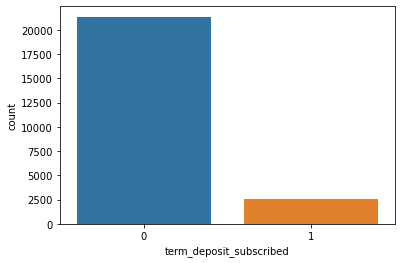

In [60]:
sns.countplot(x='term_deposit_subscribed',data=df)

In [61]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique()) 

customer_id
['id_32289' 'id_40992' 'id_41178' ... 'id_44679' 'id_4841' 'id_1723']
job_type
['blue-collar' 'management' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
marital
['married' 'single' 'divorced' nan]
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing_loan
['no' 'yes']
personal_loan
['yes' 'no' nan]
communication_type
['cellular' 'unknown' 'telephone']
month
['nov' 'may' 'aug' 'apr' 'feb' 'jun' 'jul' 'jan' 'oct' 'sep' 'mar' 'dec']
prev_campaign_outcome
['other' 'unknown' 'failure' 'success']


<AxesSubplot:xlabel='count', ylabel='job_type'>

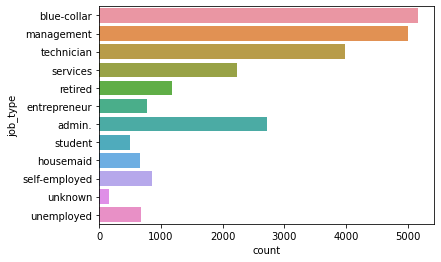

In [62]:
sns.countplot(y='job_type',data=df)

<AxesSubplot:xlabel='count', ylabel='marital'>

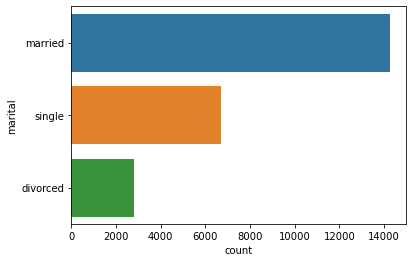

In [63]:
sns.countplot(y='marital',data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

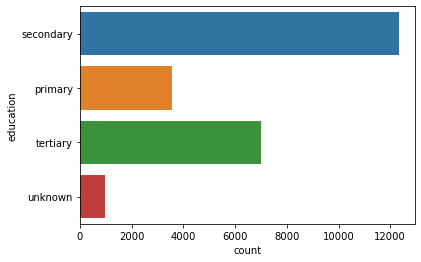

In [64]:
sns.countplot(y='education',data=df)

<AxesSubplot:xlabel='count', ylabel='default'>

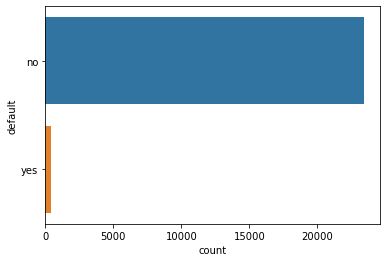

In [65]:
sns.countplot(y='default',data=df) #unimportant

<AxesSubplot:xlabel='count', ylabel='housing_loan'>

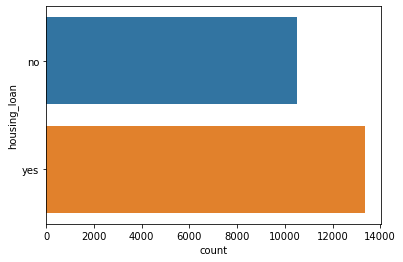

In [66]:
sns.countplot(y='housing_loan',data=df) #balance in the feature

<AxesSubplot:xlabel='count', ylabel='personal_loan'>

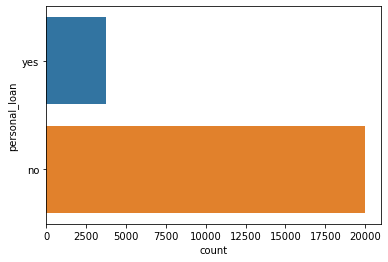

In [67]:
sns.countplot(y='personal_loan',data=df) #with no loans don't opt for term deposits

<AxesSubplot:xlabel='count', ylabel='communication_type'>

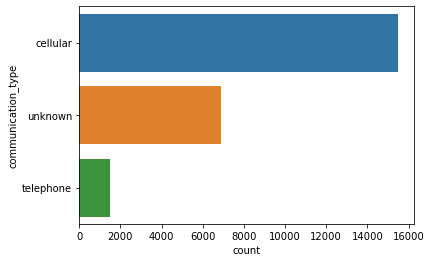

In [68]:
sns.countplot(y='communication_type',data=df)

<AxesSubplot:xlabel='count', ylabel='month'>

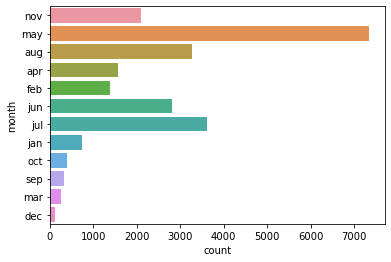

In [69]:
sns.countplot(y='month',data=df)

<AxesSubplot:xlabel='count', ylabel='prev_campaign_outcome'>

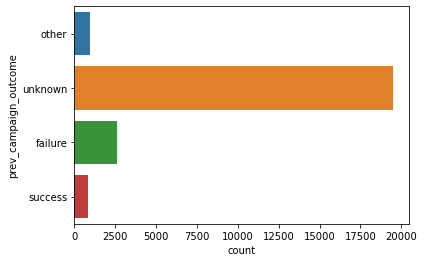

In [70]:
sns.countplot(y='prev_campaign_outcome',data=df)

In [71]:
df.customer_age=df.customer_age.fillna(34)
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,other,0
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,unknown,0
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,unknown,0
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,unknown,0


In [72]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [73]:
df = df.replace('unknown', np.NaN)

In [74]:
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                        154
marital                         107
education                       986
default                           0
balance                         277
housing_loan                      0
personal_loan                   113
communication_type             6892
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         96
num_contacts_prev_campaign        0
prev_campaign_outcome         19513
term_deposit_subscribed           0
dtype: int64

In [75]:
df = df[df.job_type.notna()]
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                         107
education                       915
default                           0
balance                         277
housing_loan                      0
personal_loan                   113
communication_type             6831
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19377
term_deposit_subscribed           0
dtype: int64

In [76]:
df = df[df.marital.notna()]
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                           0
education                       913
default                           0
balance                         273
housing_loan                      0
personal_loan                   113
communication_type             6795
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19294
term_deposit_subscribed           0
dtype: int64

In [77]:
def randomCatFill(df, colName):
    perm = np.random.permutation(df[colName])
    
    perm = perm[~pd.isnull(perm)]
    
    end = len(perm)
    df[colName] = df[colName].apply(lambda x: perm[np.random.randint(end)] if pd.isnull(x) else x)

In [78]:
randomCatFill(df, 'education')
randomCatFill(df, 'personal_loan')
randomCatFill(df, 'communication_type')

In [79]:
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                           0
education                         0
default                           0
balance                         273
housing_loan                      0
personal_loan                     0
communication_type                0
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19294
term_deposit_subscribed           0
dtype: int64

In [80]:
df.prev_campaign_outcome = df.prev_campaign_outcome.fillna("nonexistent")

In [81]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       273
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       95
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [82]:
df = df[df.num_contacts_in_campaign.notna()]
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       273
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign        0
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [83]:
df.balance.mode()

0    3.0
dtype: float64

In [84]:
current_balance = df.pivot_table(values='balance', columns='job_type', aggfunc=(lambda x: x.mean()[0]))

In [85]:
current_balance

job_type,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
balance,1125.321563,1102.675761,1512.725955,1442.75,1794.717285,2000.95986,1677.40311,965.30371,1326.635628,1227.701282,1419.781297


In [86]:
miss_values = df['balance'].isnull()   

In [87]:
miss_values

0        False
1        False
2        False
3        False
4        False
         ...  
23875    False
23876    False
23877    False
23878    False
23879    False
Name: balance, Length: 23524, dtype: bool

In [88]:
df.loc[miss_values, 'balance'] = df.loc[miss_values,'job_type'].apply(lambda x: current_balance[x])

In [89]:
df.isnull().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [90]:
df.balance

0         934.0
1        1352.0
2         495.0
3         650.0
4         265.0
          ...  
23875     567.0
23876    1072.0
23877     242.0
23878    2699.0
23879    1045.0
Name: balance, Length: 23524, dtype: float64

### Corelation Matrix

<AxesSubplot:>

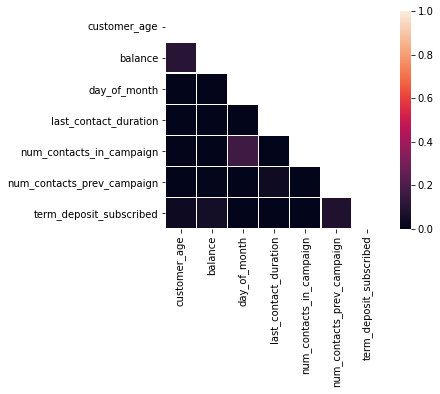

In [91]:
# get the correlation matrix
corr = df.corr()

# create a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the correlation heatmap
sns.heatmap(corr, vmin=0, vmax=1, square=True,
           linewidths=.5, mask=mask, fmt='.2f')

In [92]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,nonexistent,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,nonexistent,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,yes,cellular,26,may,880,1.0,0,nonexistent,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,nonexistent,0


In [93]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

n_job=pd.get_dummies(df.job_type)
n_marital=pd.get_dummies(df.marital)
n_education=pd.get_dummies(df.education)
n_loan=pd.get_dummies(df.personal_loan)
n_contact=pd.get_dummies(df.communication_type)
n_month=pd.get_dummies(df.month)
n_poutcome=pd.get_dummies(df.prev_campaign_outcome)

In [94]:
df = pd.concat([df,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome],axis=1)

In [95]:
df.columns

Index(['customer_id', 'customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'divorced', 'married', 'single', 'primary', 'secondary', 'tertiary',
       'no', 'yes', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'failure',
       'nonexistent', 'other', 'success'],
      dtype='object')

In [96]:
df.drop(['job_type','month','marital','education','default','housing_loan','personal_loan','communication_type',
         'prev_campaign_outcome','customer_id'],axis=1,inplace=True)

In [98]:
df.to_csv("ohe_data.csv",header=True,index=False)